# Explore experiences result on conll2003

In [1]:
import sys
sys.path.insert(1, '../../utils/')

from resultsUtils import build_jsons, json2pandas
from visuClass import visualizer

import numpy as np
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

# Build jsons

In [2]:
# fetch results and store in different paths (do not launch everytime, it's super slow!!!!)
path2jsons = '../jsons/'

In [5]:
build_jsons('../results/', path2jsons, show_path=False)

100%|██████████| 30/30 [01:15<00:00,  2.50s/it]

Collected 30 xperiences in ../results/ and stored all in ../jsons/


# Analysis

In [4]:
df = json2pandas(path2jsons, trajs = False, fixed_iter=None, verbose=False)

##  Medpost embeddings

In [5]:
#df['best_iter'].plot(kind = 'hist', bins = 30)
print(df.shape)
df.head(5)

(30, 16)


,best_iter,char_embedding_size,char_hidden_layer_size,dropout_rate,f1,feature_data,hidden_layer_size,nb_iter,nb_train_tokens,opt_decay_use,patience,precision,recall,time_elapsed,word_emb_dim,word_emb_train
0,26,24,32,0.5,97.45,False,64,36,154552.0,False,10,97.36,97.55,136.0,25,True
0,5,24,32,0.5,95.38,False,64,15,154552.0,False,10,95.21,95.54,56.0,25,True
0,18,24,32,0.5,96.73,False,64,28,154552.0,False,10,96.66,96.81,105.0,25,True
0,17,24,32,0.5,97.85,False,64,27,154552.0,False,10,97.82,97.87,102.0,25,True
0,30,24,32,0.5,96.69,False,64,40,154552.0,False,10,96.64,96.74,150.0,25,True


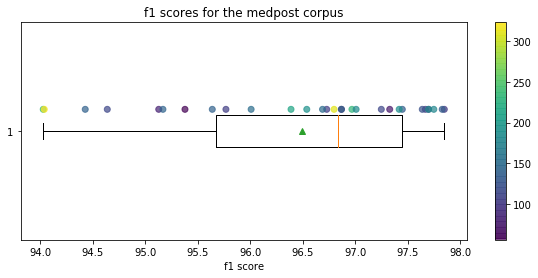

average:  96.49000000000001
sd:  1.1684319977359967
max diff:  3.819999999999993
max diff perc:  0.04062533234074224


In [7]:
plt.figure(figsize=(10,4))
plt.boxplot(df['f1'], vert=False, showmeans=True)
plt.scatter(df['f1'], np.repeat(1.1, len(df['f1'])), alpha = 0.7, c = df.time_elapsed)
plt.xlabel('f1 score')
plt.title('f1 scores for the medpost corpus')
plt.colorbar()
plt.show()
print('average: ', np.mean(df['f1']))
print('sd: ', np.std(df['f1']))
print('max diff: ', np.max(df['f1']) - np.min(df['f1']))
print('max diff perc: ', (np.max(df['f1']) - np.min(df['f1']))/np.min(df['f1']))